In [1]:
cd ~/data/ciss/opus

/Users/klay6683/data/ciss/opus


In [2]:
!which python

/Users/klay6683/miniconda3/bin/python


In [3]:
fnames = !ls *map.cal.cub
fnames

['N1595336397_1.map.cal.cub',
 'N1595336558_1.map.cal.cub',
 'N1595336719_1.map.cal.cub',
 'N1595336880_1.map.cal.cub',
 'N1595337041_1.map.cal.cub',
 'N1595337202_1.map.cal.cub']

In [6]:
from pyciss import io

In [7]:
cube = io.RingCube(fnames[0])

In [8]:
for fname in fnames:
    print(fname)
    ringcube = io.RingCube(fname)
    print(ringcube.imagetime)
#     ringcube.imshow(save_ext='')
#     ringcube.imshow(data=ringcube.density_wave_subtracted, save_ext='wave_subtracted')

N1595336397_1.map.cal.cub
2008-203T12:21:46.121
N1595336558_1.map.cal.cub
2008-203T12:24:27.120
N1595336719_1.map.cal.cub
2008-203T12:27:08.119
N1595336880_1.map.cal.cub
2008-203T12:29:49.118
N1595337041_1.map.cal.cub
2008-203T12:32:30.117
N1595337202_1.map.cal.cub
2008-203T12:35:11.116


In [11]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


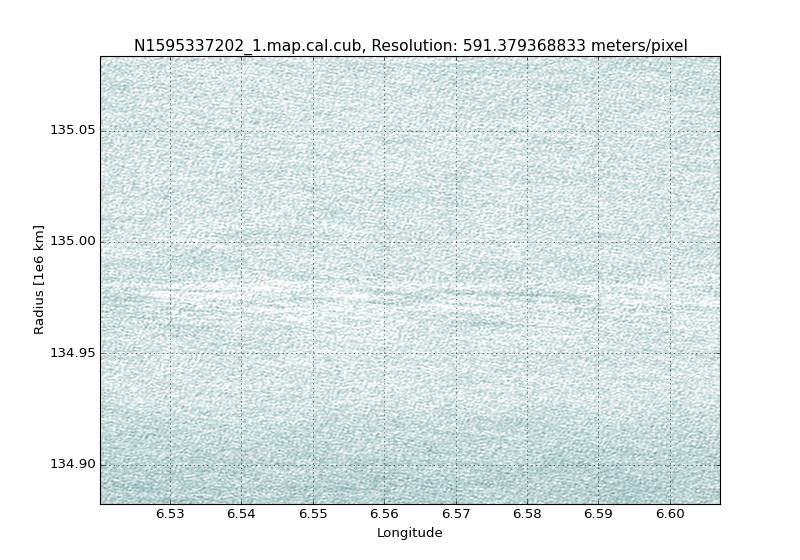

In [12]:
ringcube.imshow(data=ringcube.density_wave_subtracted)

In [4]:
import gdal
ds = gdal.Open('img.cal.map.cub')
print("proj:", ds.GetProjection())
print("GeoTrans:", ds.GetGeoTransform())
x, y = gdal.ApplyGeoTransform(ds.GetGeoTransform(), 0, 0)
print("X:{}, Y:{}".format(x, y))
import osr
srs = osr.SpatialReference(ds.GetProjection())
print(srs.ExportToPrettyWkt())
ct = osr.CoordinateTransformation(srs, srs.CloneGeogCS())
print("CoordTrans:", ct)
print(ct.TransformPoint(x, y))

('proj:', 'PROJCS["Sinusoidal Mars",GEOGCS["GCS_Mars",DATUM["D_Mars",SPHEROID["Mars",3396190,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",296.28065864847],PARAMETER["false_easting",0],PARAMETER["false_northing",0]]')
('GeoTrans:', (-4959.6267029156, 0.49556621731771, 0.0, -4803213.1200085, 0.0, -0.49556621731771))
X:-4959.62670292, Y:-4803213.12001
PROJCS["Sinusoidal Mars",
    GEOGCS["GCS_Mars",
        DATUM["D_Mars",
            SPHEROID["Mars",3396190,0]],
        PRIMEM["Reference_Meridian",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Sinusoidal"],
    PARAMETER["longitude_of_center",296.28065864847],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0]]
('CoordTrans:', <osgeo.osr.CoordinateTransformation; proxy of None >)


NotImplementedError: Wrong number of arguments for overloaded function 'CoordinateTransformation_TransformPoint'.
  Possible C/C++ prototypes are:
    TransformPoint(OSRCoordinateTransformationShadow *,double [3])
    TransformPoint(OSRCoordinateTransformationShadow *,double [3],double,double,double)


In [53]:
gdal.VersionInfo()

'1110200'

In [7]:
try:
    from osgeo import gdal, osr
except ImportError:
    import gdal
    import osr

import sys

# =============================================================================
def Usage():
    print('')
    print('Read coordinate system and geotransformation matrix from input')
    print('file and report latitude/longitude coordinates for the center')
    print('of the specified pixel.')
    print('')
    print('Usage: tolatlong.py pixel line infile')
    print('')
    sys.exit( 1 )

# =============================================================================

infile = None
pixel = None
line = None

# =============================================================================
# Parse command line arguments.
# =============================================================================
i = 1
while i < len(sys.argv):
    arg = sys.argv[i]

    if pixel is None:
        pixel = float(arg)

    elif line is None:
        line = float(arg)

    elif infile is None:
        infile = arg

    else:
        Usage()

    i = i + 1

if infile is None:
    Usage()
if pixel is None:
    Usage()
if line is None:
    Usage()

# Open input dataset
indataset = gdal.Open( infile, gdal.GA_ReadOnly )

# Read geotransform matrix and calculate ground coordinates
geomatrix = indataset.GetGeoTransform()
X = geomatrix[0] + geomatrix[1] * pixel + geomatrix[2] * line
Y = geomatrix[3] + geomatrix[4] * pixel + geomatrix[5] * line

# Shift to the center of the pixel
X += geomatrix[1] / 2.0
Y += geomatrix[5] / 2.0

# Build Spatial Reference object based on coordinate system, fetched from the
# opened dataset
srs = osr.SpatialReference()
if srs.ImportFromWkt(indataset.GetProjection()) != 0:
    print("ERROR: Cannot import projection '%s'" % indataset.GetProjection())
    sys.exit(1)

srsLatLong = srs.CloneGeogCS()
ct = osr.CoordinateTransformation(srs, srsLatLong)
(int, lat, height) = ct.TransformPoint(X, Y)


ValueError: could not convert string to float: '-f'

In [7]:
import pandas as pd

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,12)

In [ ]:
plt.cm.Y

In [9]:
data.shape

(8596, 18812)

In [5]:
def show_window(x=0,y=0):
    xi = slice(x*1024, (x+1)*1024)
    yi = slice(y*1024, (y+1)*1024)
    plt.imshow(data[xi, yi], cmap='gray', aspect='auto',
        interpolation='none')
    plt.grid()
    print(xi)
    print(yi)
    plt.colorbar()

In [12]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


slice(0, 1024, None)
slice(9216, 10240, None)


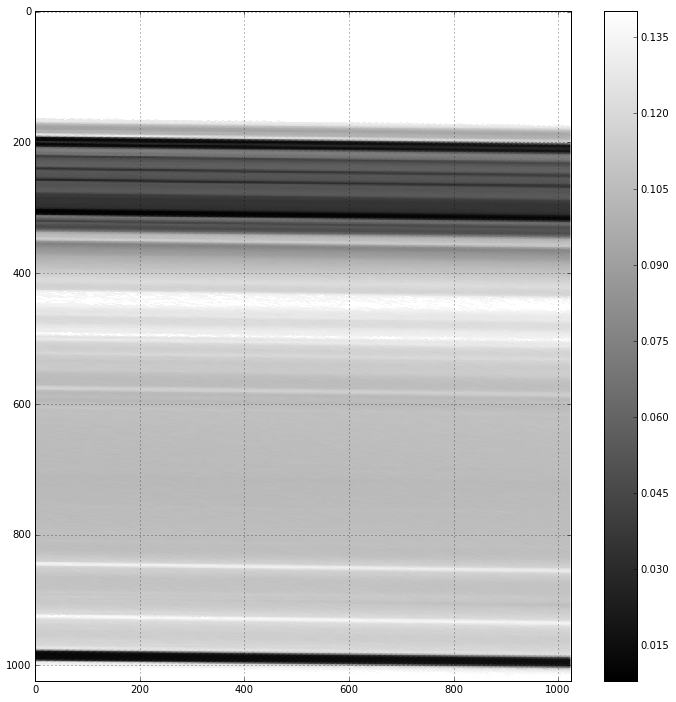

In [16]:
interact(show_window, 
         x=(0, data.shape[0]/1024), 
         y=(0, data.shape[1]/1024));

In [41]:
from skimage.measure import block_reduce

In [44]:
reduced = block_reduce(data, (10,10))

In [47]:
np.nanmean(reduced)

3.7520719

In [49]:
np.nanmin(reduced)

0.030904153

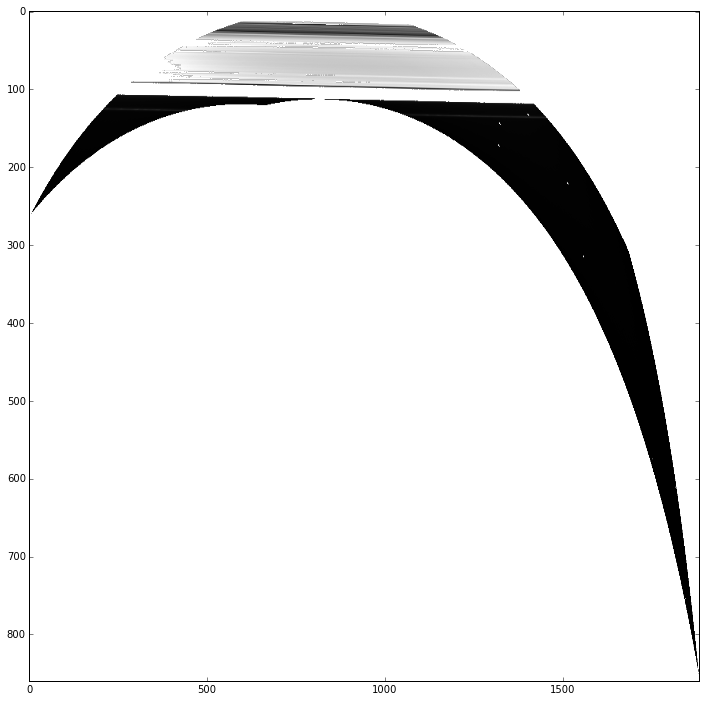

In [50]:
plt.imshow(reduced, cmap='gray')

In [51]:
cropped = reduced[:150]

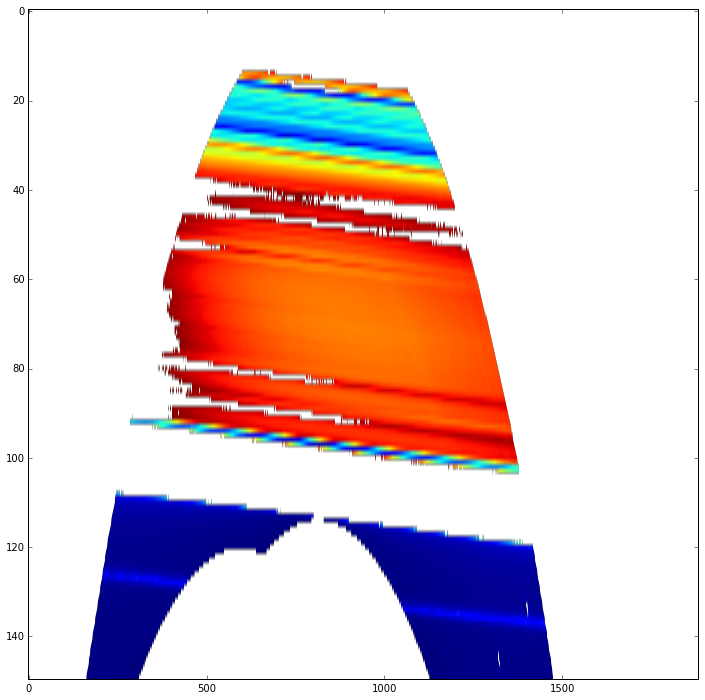

In [52]:
plt.imshow(cropped)

(150, 1882)